<a href="https://colab.research.google.com/github/aaronyu888/mat-494-notebooks/blob/main/Unconstrained_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3 Unconstrained Optimization

---



In [34]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(gradient, start, learn_rate, n_iter = 50, tolerance=1e-06):
  vector = start
  plt.scatter(vector, vector**2, c = 'red')
  for _ in range(n_iter):
    diff = -learn_rate * gradient(vector)
    if np.all(np.abs(diff) <= tolerance):
      break
    vector += diff
    plt.scatter(vector, vector**2, c = 'red')
  plt.scatter(vector, vector**2, c = 'blue')
  return vector


2.210739197207331e-06


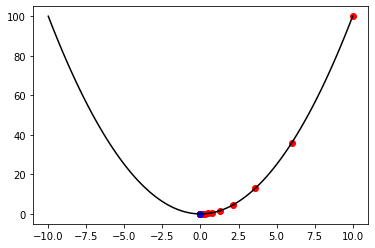

In [35]:
# gradient descent on simple convex function
x = np.linspace(-10,10,100)
y = x**2
plt.plot(x, y, c = 'black')
print(gradient_descent(gradient=lambda v: 2 * v, start = 10, learn_rate = 0.2))
plt.show()

-1.4207567437458342


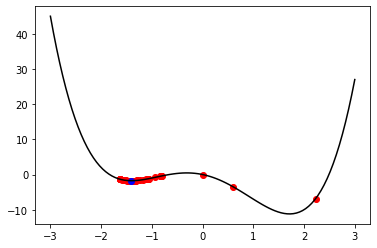

In [36]:
# gradient descent on non-convext function

def gradient_descent(gradient, start, learn_rate, n_iter = 50, tolerance=1e-06):
  vector = start
  plt.scatter(vector, vector**4 - 5  * vector**2 - 3 * vector, c = 'red')
  for _ in range(n_iter):
    diff = -learn_rate * gradient(vector)
    if np.all(np.abs(diff) <= tolerance):
      break
    vector += diff
    plt.scatter(vector, vector**4 - 5  * vector**2 - 3 * vector, c = 'red')
  plt.scatter(vector, vector**4 - 5  * vector**2 - 3 * vector, c = 'blue')
  return vector

x = np.linspace(-3,3,100)
y = x**4 - 5 * x**2 - 3 * x 
plt.plot(x, y, c = 'black')
print(gradient_descent(gradient=lambda v: 4 * v**3 - 10 * v - 3, start = 0, learn_rate = 0.2))
plt.show()

As you can see from the above output, gradient descent can get stuck at local minimizers. If we adjust the learning rate, we can get much closer to the global minimizer.

1.285401330315467


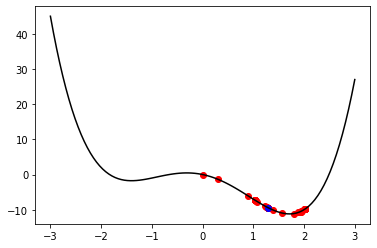

In [37]:
plt.plot(x, y, c = 'black')
print(gradient_descent(gradient=lambda v: 4 * v**3 - 10 * v - 3, start = 0, learn_rate = 0.1))
plt.show()

In [38]:
#sum of squared residuals
def ssr_gradient(x, y, b):
  res = b[0] + b[1] * x - y
  return res.mean(), (res * x).mean()

In [39]:
# gradient descent for 2d
def gradient_descent(gradient, x, y, start, learn_rate = 0.1, n_iter = 50, tolerance = 1e-06):
  vector = start
  for _ in range(n_iter):
    diff = -learn_rate * np.array(gradient(x, y, vector))
    if np.all(np.abs(diff) <= tolerance):
      break
    vector += diff
  return vector

[5.62822349 0.54012867]


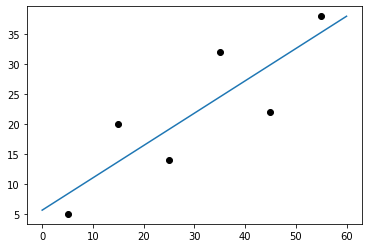

In [44]:
# gradient descent for arbitrary values of x and y
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])
v = np.linspace(0,60,1000)
vector = gradient_descent(ssr_gradient, x, y, start=[0.5, 0.5], learn_rate=0.0008,n_iter=100_000)
print(vector)
plt.plot(v, vector[0] + vector[1] * v)
plt.scatter(x, y, c = 'black')